# Method 6:

In [58]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#SMOTE 
import imblearn
from imblearn.over_sampling import SMOTE

#LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None

In [59]:
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [60]:
#get information about the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [61]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [62]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


It is seen that the highest average value is in the Si feature.

# Finding Duplicates

In [63]:
dups = data.duplicated()
print('Number of duplicate rows: %d' % dups.sum())

Number of duplicate rows: 1


+ We can see that 1 sample was repeated.

In [64]:
#dropping duplicates
print('Number of rows before discarding duplicates = %d' % data.shape[0])
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % data2.shape[0])

Number of rows before discarding duplicates = 214
Number of rows after discarding duplicates = 213


# Checking for dataset imbalance

Clusters where the classes are not evenly distributed and there is approximately the same number of data for each class are called unbalanced data sets. Although the unbalanced dataset problem gives a high accuracy value of the created model, when the confusion matrix is ​​examined, it can be seen that most of the high accuracy rate is caused by a certain class. In order to eliminate such problems, eliminating the data imbalance allows us to get more accurate results.

In [65]:
data2.Type.value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Text(0.5, 1.0, 'Number of Glass Rounds')

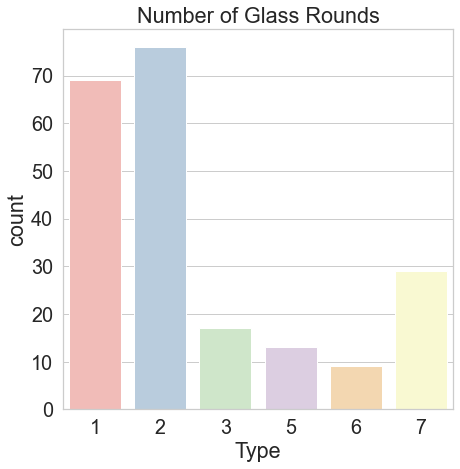

In [66]:
#representation on the chart
sns.set(style = 'whitegrid', font_scale = 1.8)
plt.subplots(figsize = (7,7))
sns.countplot(x = 'Type', data = data2, palette = 'Pastel1').set_title('Number of Glass Rounds')

+ Type 2 and Type 1 contain more samples than other types.

# Checking for outliers

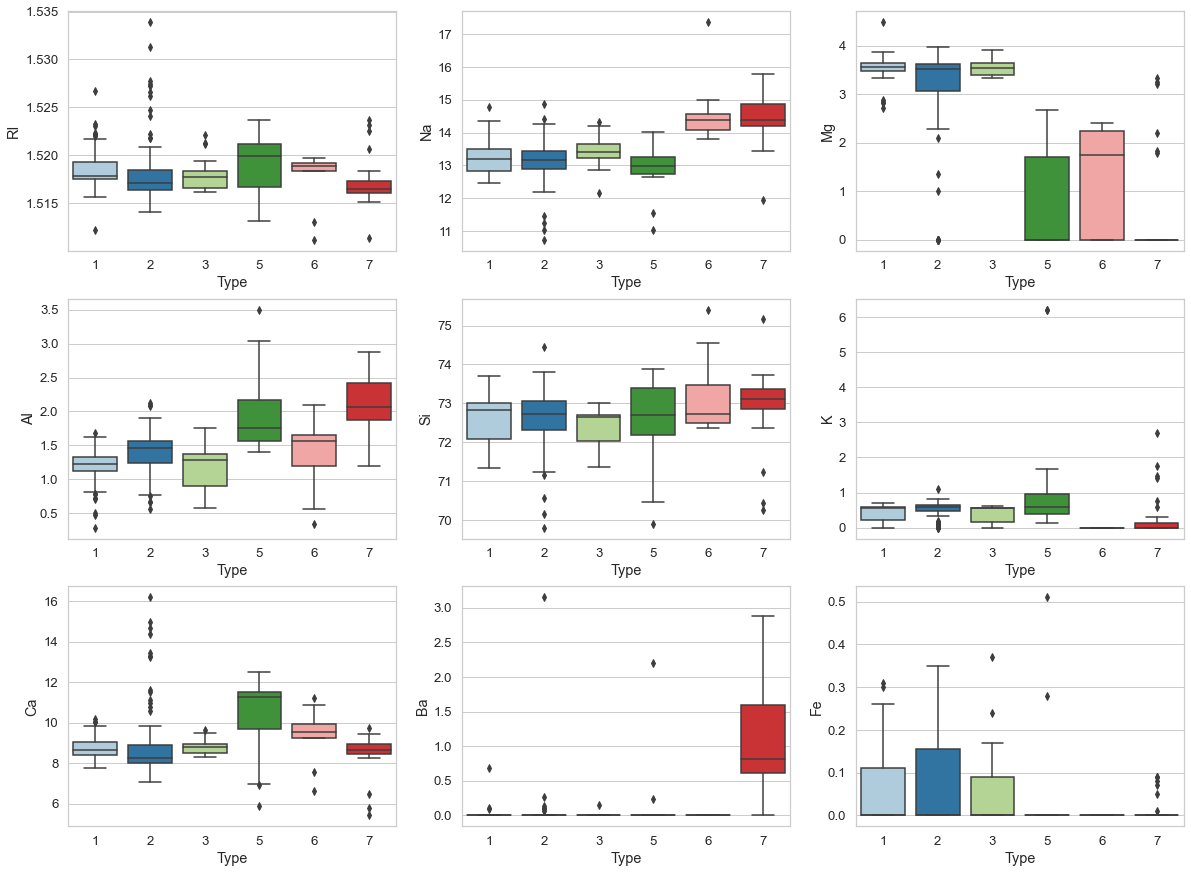

In [67]:
#distribution of features according to glass types.
target_class_name = 'Type'
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

sns.set(style = 'whitegrid', font_scale = 1.2, palette = 'Paired')
plt.subplots(figsize = (20,15))

for i in range(1,10):
    plt.subplot(3,3,i)
    sns.boxplot(x ='Type', y = features[i-1], data = data2)

In general, the 2nd glass type has outliers for each property.

# Correlation Matrix

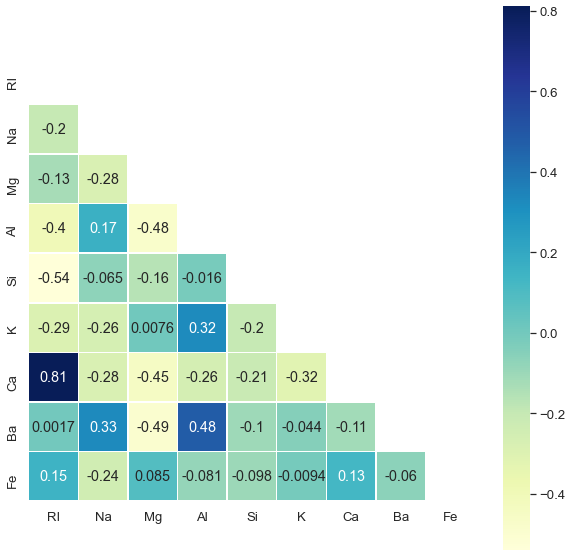

In [68]:
correlation = data2[features].corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (10, 10))
sns.heatmap(correlation, mask = mask, cmap = 'YlGnBu', annot = True, linewidth = .5, square = True)

+ In the data set, there is a high correlation of 0.81 between the Ca element and the brittleness index (RI) of the glass.
+ 0.48 between Ba - Al
+ 0.33 from Ba to Na
+ There is a negative correlation between Si and the fragility index of glass with a value of -0.54.

# Splitting Dataset

In [69]:
X = pd.DataFrame(data2.drop(["Type"], axis = 1),
            columns=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'])
y = data2.Type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 40, stratify = y)

# K-Nearest Neighbors Classification

In [70]:
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': np.arange(1,50)}
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

In [71]:
n_neig = knn_cv_model.best_params_['n_neighbors']

print(knn_cv_model.best_score_)
print(knn_cv_model.best_params_)

0.7235294117647058
{'n_neighbors': 1}


In [72]:
knn_tuned = KNeighborsClassifier(n_neighbors = n_neig).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score for KNN: {}'.format(knn_accuracy)) 

Accuracy score for KNN: 0.7674418604651163


# Confusion Matrix of KNN




A complexity matrix was created to calculate the metrics that measure the success of classification models. True Positive, False Positive, False Negative and True Negative values ​​for each class are found on the matrix.


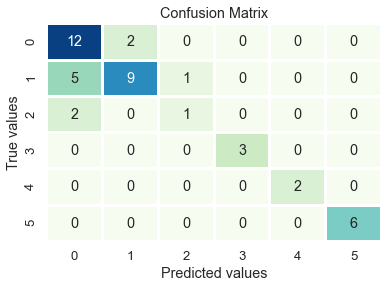

In [73]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, lw = 2, cbar = False, cmap = 'GnBu')
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.title('Confusion Matrix')
plt.show()

+ Class 1: TP =12, FP = 7, FN = 2, TN = 22 <Br>
+ Class 2: TP = 9, FP = 2, FN = 6, TN = 26 <Br>
+ Class 3: TP = 1, FP = 1, FN = 2, TN = 41 <Br>
+ Class 5: TP = 3, FP = 0, FN = 0, TN = 40 <Br>
+ Class 6: TP = 2, FP = 0, FN = 0, TN = 41 <Br>
+ Class 7: TP = 6, FP = 0, FN = 0, TN = 37 <Br>

In [74]:
#Classification report for KNN
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.63      0.86      0.73        14
           2       0.82      0.60      0.69        15
           3       0.50      0.33      0.40         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.77        43
   macro avg       0.82      0.80      0.80        43
weighted avg       0.78      0.77      0.76        43



+ The Precision value shows how many of the positively predicted values ​​are actually positive.

+ The Recall value shows how many of the transactions we need to predict positively are positive.

+ F1-score value shows the harmonic average of precision and recall values.

# SMOTE (Synthetic Minority Over-sampling Technique)

+ One of the methods that can be used to eliminate the imbalance in the data set is the sampling (resampling) process. There are two methods available:

+ The first method is to obtain classes with equal number of data by increasing the data of minority classes with various methods. It is called oversampling.

+ Another method is to obtain a balanced dataset by removing the data belonging to the weighted class from the dataset. It is referred to as the undersampling process.

+ The oversampling method was preferred because the number of samples in the used dataset is small and undersampling will cause data loss. In order to apply this method, synthetic data belonging to minority classes were produced by using the SMOTE technique in the imbalanced-learn library.

+ The k nearest neighbors of each observation belonging to the minority class are searched. The difference between the observation and its k nearest neighbors is taken, a random number is chosen between (0,1) and multiplied by the difference.

Text(0.5, 1.0, 'Before SMOTE')

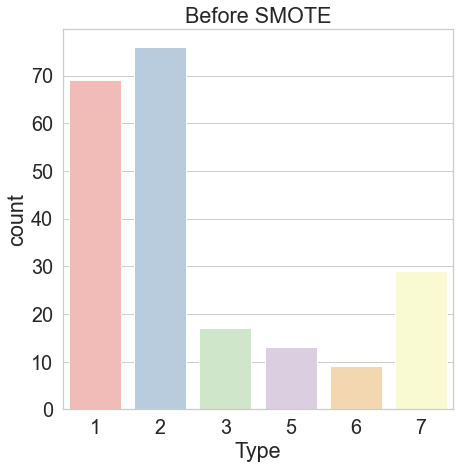

In [75]:
sns.set(style = 'whitegrid', font_scale = 1.8)
plt.subplots(figsize = (7,7))
sns.countplot(x = y, palette = 'Pastel1').set_title('Before SMOTE')

+ Class distributions are shown on the graph before the SMOTE operation is performed.


+ There are 69 examples for Class 1, 76 examples for Class 2, 17 examples for Class 3, 13 examples for Class 5, 9 examples for Class 6, and 29 examples for Class 7.


Text(0.5, 1.0, 'After SMOTE')

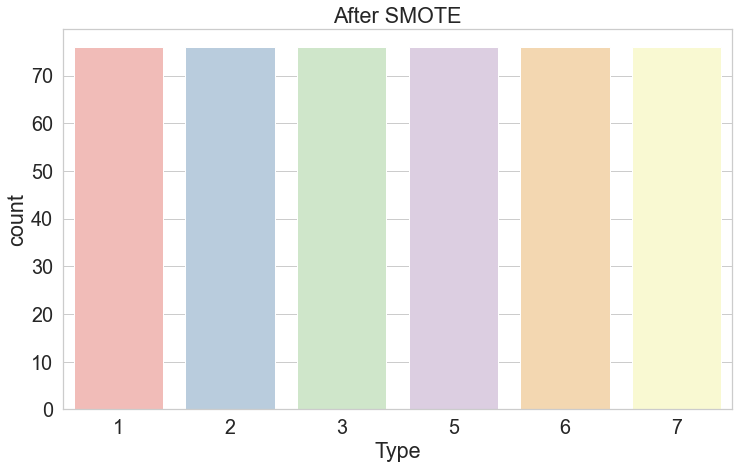

In [76]:
sm = SMOTE(sampling_strategy = 'not majority', random_state = 42)
x_res, y_res = sm.fit_resample(X, y)
y_res_df = pd.DataFrame(y_res)


sns.set(style = 'whitegrid', font_scale = 1.8)
plt.subplots(figsize = (12,7))
sns.countplot(x = y_res_df.Type, palette = 'Pastel1').set_title('After SMOTE')

In [77]:
print(x_res.shape)
print(y_res.shape)

(456, 9)
(456,)


In [78]:
y_res.value_counts()

7    76
6    76
5    76
3    76
2    76
1    76
Name: Type, dtype: int64

+ After applying SMOTE, our total number of data increased from 213 to 456.
The number of samples for all classes is equalized to 76.

# Splitting Data

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size = .2, random_state = 40, stratify = y_res)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# LDA (Linear Discriminant Analysis)


It is used as a size reduction technique. It reduces size in the dataset by maximizing the difference between classes. The aim is to prevent overfitting and reduce computational costs.

In [80]:
lda = LDA(n_components = 5)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(364, 5)
(92, 5)


+ In the data set, 9 attributes were reduced to 5 meaningful components with the help of LDA.

# K-Nearest Neighbors Classification

In [81]:
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': np.arange(1,50)}
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)
n_neighbor = knn_cv_model.best_params_['n_neighbors']

print(knn_cv_model.best_score_)
print(knn_cv_model.best_params_)


0.8324324324324325
{'n_neighbors': 3}


In [82]:
knn_tuned = KNeighborsClassifier(n_neighbors = n_neighbor).fit(X_train,y_train)
knn_y_pred = knn_tuned.predict(X_test)
knn_acc = accuracy_score(y_test, knn_y_pred)
print('Accuracy score for KNN: {}'.format(knn_acc)) 

Accuracy score for KNN: 0.8478260869565217


# Confusion Matrix of KNN

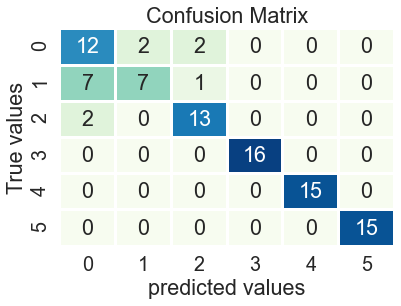

In [83]:
sns.heatmap(confusion_matrix(y_test, knn_y_pred), annot = True, lw = 2, cbar = False, cmap = 'GnBu')
plt.ylabel('True values')
plt.xlabel('predicted values')
plt.title('Confusion Matrix')
plt.show() 

+ Class 1: TP = 12, FP = 9, FN = 4, TN = 68 <Br>
+ Class 2: TP = 7,  FP = 2, FN = 8, TN = 75 <Br>
+ Class 3: TP = 13, FP = 3, FN = 2, TN = 74 <Br>
+ Class 5: TP = 16, FP = 0, FN = 0, TN = 76 <Br>
+ Class 6: TP = 15, FP = 0, FN = 0, TN = 77 <Br>
+ Class 7: TP = 15, FP = 0, FN = 0, TN = 77 <Br>

In [84]:
#Classification report for KNN
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           1       0.57      0.75      0.65        16
           2       0.78      0.47      0.58        15
           3       0.81      0.87      0.84        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        15

    accuracy                           0.85        92
   macro avg       0.86      0.85      0.85        92
weighted avg       0.86      0.85      0.84        92



# Insights
+ The Accuracy of the model has increased to 85% 